# Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to Read Data and Return 2 Dataframes

In [2]:
def datareader(df):
    dt=open(df,"r+").read() 
    dt=dt[85:]
    data=open("temp.csv","w+").write(dt) 
    data=pd.read_csv("temp.csv")
    data=data.fillna(data.mean())
    return data

In [3]:
def dataformatter(filename):
    data=datareader(filename)
    yrcols=data.columns.tolist()[4:-1]
    data=data[(data['Indicator Name']=="Methane emissions (kt of CO2 equivalent)")|((data['Indicator Name']=="Energy use (kg of oil equivalent per capita)"))]
    global country_all
    country_all=["Turkey", "Germany", "India", "France", "Iraq", "World"]
    fltr=data['Country Name'].isin(country_all)
    data=data[fltr]
    #print(len(yrcols))
    cntry, ind=data['Country Name'].tolist(), data['Indicator Name'].tolist()
    coltodrop=['Unnamed: 65','Country Code','Indicator Code']
    dfcom=[]
    for i in range(len(ind)):
        dfcom.append(cntry[i]+"-"+ind[i])
    data.insert(4,"Country with Indicator",dfcom)
    data1=data.T.iloc[4:][:-1]
    data=data.drop("Country with Indicator",axis=1)
    data1.columns=data1.iloc[0]
    data1=data1.iloc[1:]
    data1['Year']=yrcols
    data1=data1.set_index("Year")
    data=data.reset_index(drop=True).drop(coltodrop,axis=1)
    return data,data1  

In [10]:
df ,df1=dataformatter("API_19_DS2_en_csv_v2_3931355.csv");

/var/folders/wf/q0j4ltc95xv5zccvt5vhh2tr0000gn/T/ipykernel_77037/1527020614.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.fillna(data.mean())


KeyError: 'Country Name'

In [ ]:
df.head()   # First Data with Year Column

In [ ]:
df1.head()   # second data with country column

# Data Analysis

In [ ]:
met,ener=[],[]
print("===========================================================")
for i in range(len(country_all)):
    dft=df[df['Country Name']==country_all[i]]
    dft=dft.drop('Indicator Name',axis=1)
    print("                       {}".format(country_all[i]))
    print("===========================================================")
    print("\tMethane emissions by {} is {}".format(country_all[i],round(dft.iloc[0,1:].mean(),2)))
    print("\tEnergy use by {} is {}".format(country_all[i],round(dft.iloc[1,1:].mean(),2)))
    print("===========================================================")
    met.append(round(dft.iloc[0,1:].mean(),2))
    ener.append(round(dft.iloc[1,1:].mean(),2))

In [ ]:
st1=statistics.copy()
statistics=pd.DataFrame({"Country":country_all,"Methane emissions":met,"Energy use":ener})
statistics=statistics.set_index("Country")[:-1]
statistics=statistics.sort_values(by="Methane emissions")

plt.figure(figsize=(10,5))
plt.title("Methane emissions by Country",fontsize=18,color="g")
plt.bar(statistics.index,statistics['Methane emissions'],color="rgb")
plt.plot(statistics['Methane emissions'],"k--")
plt.plot(statistics['Methane emissions'],"Dy")
plt.xlabel("Country",fontsize=14,color="g")
plt.ylabel("Methane emissions",fontsize=14,color="g")
plt.grid()
plt.show()

In [ ]:
statistics=statistics.sort_values(by="Energy use")
plt.figure(figsize=(10,5))
plt.title("Energy use by Country",fontsize=18,color="g")
plt.bar(statistics.index,statistics['Energy use'],color="rgb")
plt.plot(statistics['Energy use'],"k--")
plt.plot(statistics['Energy use'],"Dy")
plt.xlabel("Country",fontsize=14,color="g")
plt.ylabel("Energy use",fontsize=14,color="g")
plt.grid()
plt.show()

In [ ]:
coldata=df1.columns
idxdata=df1.index
dfvals=np.array(df1.values,float)
df1=pd.DataFrame(dfvals,columns=coldata,index=idxdata)
df1.info()

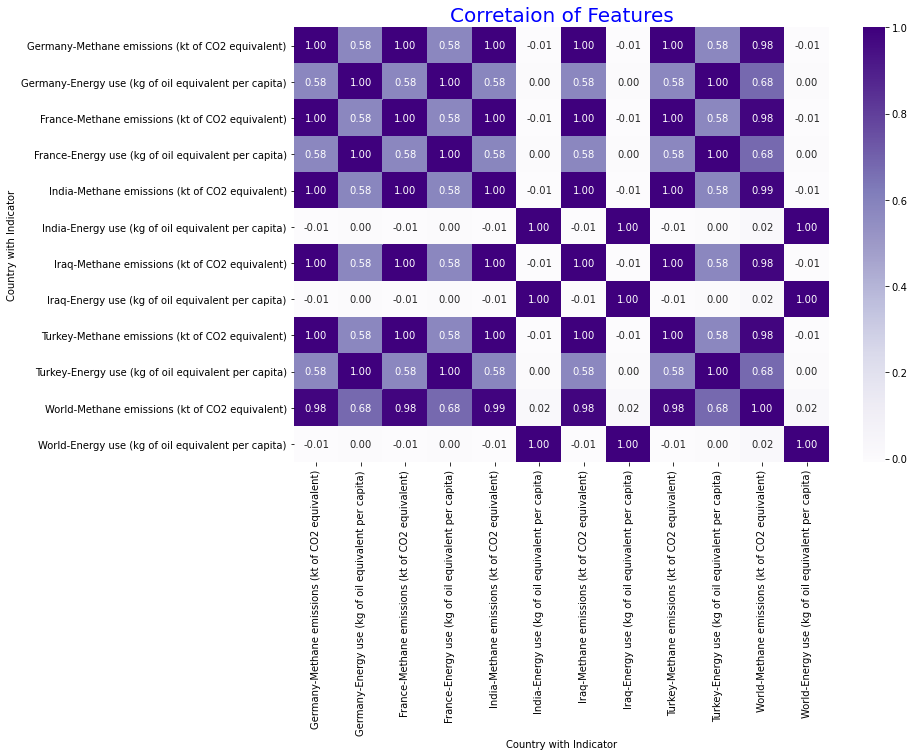

In [54]:
plt.figure(figsize=(12,8))
plt.title("Corretaion of Features",fontsize=20,color="b")
sns.heatmap(df1.corr(),annot=True,fmt="0.2f",cmap="Purples")
plt.show()

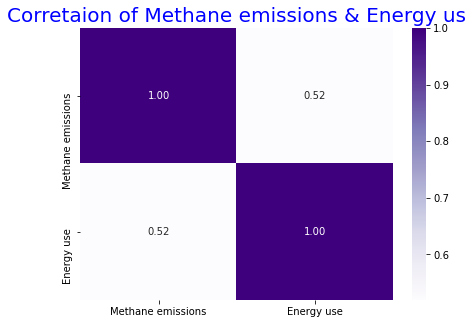

In [55]:
plt.figure(figsize=(7,5))
plt.title("Corretaion of Methane emissions & Energy use",fontsize=20,color="b")
sns.heatmap(st1.corr(),annot=True,fmt="0.2f",cmap="Purples")
plt.show()